# Practical session 3 - Brownian motion, Fourier transform

Students (pair): group F
- [Student 1]([link](https://github.com/Ptiroro)) : Romain BOQUET
- [Student 2]([link](https://github.com/DubusA)) : Antoine DUBUS

```
conda create --name=lab3 --file=requirement.txt
conda activate lab3
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab3
```

In [1]:
%load_ext autoreload
%autoreload 2

## <a name="ex1">Exercise 1: Brownian motion</a>

This first exercise consists in generating a Brownian motion on the closed unit ball $\mathcal{B}(\mathbf{0}, 1) = \{ \mathbf{x} \mid \Vert \mathbf{x} \Vert  \leq 1\}$, focusing first on the 2-D case. The Brownian motion is a random walk with independent, identically distributed Gaussian increments, appearing for instance in thermodynamics and statistical mechanics (to model the evolution of a large particle in a medium composed of a large number of small particles, ...). It is also connected to the diffusion process (Einstein).

Let $N \in \mathbb{N}^*$, $\delta > 0$, and $\mathbf{x} = (x_1, x_2) \in  \mathcal{B}(\mathbf{0}, 1)$. The first $N$ steps of a 2-D discrete-time Brownian motion $W$ can be generated as follows

\begin{align*}
    W_0 &= \mathbf{x}, \\
    %
    (\forall n \in \{1, \dotsc, N-1 \}), \quad W_n &= W_{n−1} + \sqrt{\delta} G_n, \quad G_n \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),
\end{align*}

where $\mathcal{N}(\mathbf{0}, \mathbf{I})$ is a Gaussian distribution with mean $\mathbf{0}$ and identity covariance matrix.

1. Define a random generator `rng`, set to a known state for reproducibility (see session 2).

**Answer:**

In [46]:
# your code
import numpy as np
from math import *
rng = np.random.default_rng(seed=42)

Generator(PCG64) at 0x17463F951C0

2. Implement a function `brownian_motion(niter, x, step, rng)` which

    - simulates $W$ until it reaches the boundary of $\mathcal{B}(\mathbf{0}, 1)$, using a maximum of $N$ iterations (`niter`), a starting point $\mathbf{x} \in \mathcal{B}(\mathbf{0}, 1)$ (`x`) and step-size $\delta$ (`step`);
    - interpolates linearly between the two last positions to determine the points $W^*$ where the trajectory crosses the boundary (if applicable);
    - returns both the whole random walk $W$ and, if appropriate, the point at the intersection between the last segment of the trajectory and $\mathcal{B}(\mathbf{0}, 1)$.
 
> Hint: 
> - you can easily derive a closed form expression for $W^*$, observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. 
> - you can also take a look at [`np.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html?highlight=roots#numpy.roots) if needed.

> Recall of the Linear Interpolation (LERP) for $n$-dimensional vectors:
> - Clearly, $\vec{D}=\alpha \vec{C}$ with $\alpha \in [0, 1]$ and hence $\vec{P}-\vec{B}= \alpha (\vec{A}-\vec{B})$ which is equivalent to $\vec{P}= (1-\alpha) \vec{B} + \alpha \vec{A}$. 
![alternatvie text](img/for_Course.png)

**Answer:**

In [49]:
# your code
# your code
def brownian_motion(niter, x, step, rng):
    """
    Simulates Brownian motion until it reaches the boundary of a unit ball.

    Parameters:
    niter (int): Maximum number of iterations.
    x (array-like): Starting point in the unit ball.
    step (float): Step size.
    rng (numpy.random.Generator): Random number generator.

    Returns:
    tuple: (trajectory, boundary_point)
        - trajectory is a list of positions visited during the random walk.
        - boundary_point is the point where the trajectory crosses the boundary (if applicable).
    """
    trajectory = [x.copy()]
    radius_sq = 1.0

    for i in range(niter):
        G = rng.standard_normal(2)
        new_x = x + sqrt(step) * G

        if np.linalg.norm(new_x) > 1.0:
            # Linear interpolation
            diff = new_x - x
            a = np.sum(diff ** 2)
            b = 2 * np.dot(x, diff)
            c = np.sum(x ** 2) - radius_sq

            # alpha will be in [0, 1], which represents the linear interpolation
            roots = np.roots([a, b, c])
            alpha = max(roots)

            # Interpolate
            boundary_point = (1 - alpha) * x + alpha * new_x
            trajectory.append(boundary_point)
            return trajectory, boundary_point

        x = new_x
        trajectory.append(x.copy())

    return trajectory, None

3. Diplay the trajectory of a Brownian motion starting from $\mathbf{x} = (0.2, 0.4)$, using $\delta = 10^{-2}$, $N = 1000$. Display the unit circle on the same figure, and highlight the intersection with the boundary of the domain (whenever it exists).

> Hint: to draw the unit disk, you can use for instance:
> ```python
> circle = plt.Circle((0,0), 1)
> fig, ax = plt.subplots()
> plt.xlim(-1.25,1.25)
> plt.ylim(-1.25,1.25)
> plt.grid(linestyle = "--", zorder = 1)
> ax.set_aspect(1)
> ax.add_artist(circle)
> ```

**Answer:**

Trajectory: [array([0.2, 0.4]), array([0.04005342, 0.3581778 ]), array([0.10141471, 0.42480819]), array([0.21376006, 0.27472912]), array([0.19926686, 0.36291644]), array([0.1715495 , 0.29852657]), array([0.31515527, 0.18185703]), array([0.37761842, 0.15239638]), array([0.24710837, 0.25981951]), array([0.47973439, 0.50803039]), array([0.56246154, 0.52515944]), array([0.78687492, 0.31025384]), array([0.89454643, 0.34029702]), array([0.97405931, 0.22629287])]
Boundary reached at: [0.97405931 0.22629287]


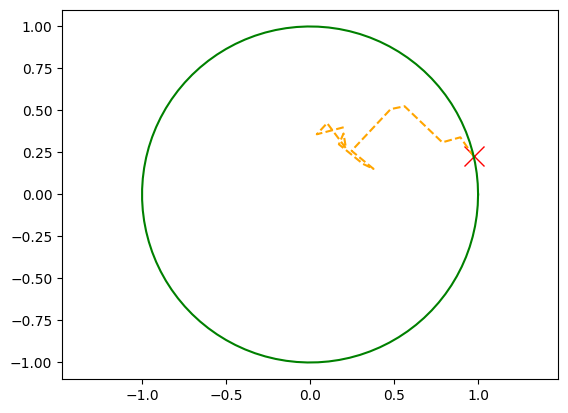

In [155]:
# your code
import matplotlib.pyplot as plt
def display_trajectory_boundary(niter, start, step_size, color_traj):
    rng = np.random.default_rng()

    trajectory, boundary_point = brownian_motion(niter, start, step_size, rng)

    print("Trajectory:", trajectory)
    if boundary_point is not None:
        print("Boundary reached at:", boundary_point)
        plt.plot(boundary_point[0], boundary_point[1], 'x', color='red', markersize=15)
    else:
        print("Did not reach the boundary.")

    trajectory= np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1], '--', color=color_traj)
    plt.plot()

    theta = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(theta)
    y = np.sin(theta)
    plt.plot(x, y, color='green')
    plt.axis('equal')

display_trajectory_boundary(1000,  np.array([0.2, 0.4]), 1e-2, 'orange')

4. Represent, on the same figure, 4 other trajectories of $W$ with the same parameters.

**Answer:**

Trajectory: [array([0.2, 0.4]), array([0.251678  , 0.46707165]), array([0.31740289, 0.51169399]), array([0.35106508, 0.61748212]), array([0.57310101, 0.71442618]), array([0.59797775, 0.66005834]), array([0.57058082, 0.62545994]), array([0.5586737, 0.5256443]), array([0.43074234, 0.36301815]), array([0.56851041, 0.35493301]), array([0.5628918, 0.5376626]), array([0.49220802, 0.44527719]), array([0.47804628, 0.32046493]), array([0.42830003, 0.27360951]), array([0.42613697, 0.40038517]), array([0.52993861, 0.24182639]), array([0.68546899, 0.20297235]), array([0.85872348, 0.16280219]), array([0.87030533, 0.15442023]), array([0.98241724, 0.18669859])]
Boundary reached at: [0.98241724 0.18669859]
Trajectory: [array([0.2, 0.4]), array([0.055888  , 0.58834435]), array([-0.01200469,  0.54394228]), array([-0.08733074,  0.59139142]), array([-0.07936105,  0.74658446]), array([-0.13711499,  0.69104017]), array([-0.17837673,  0.65919106]), array([-0.3112822 ,  0.61836134]), array([-0.31233635,  0.65

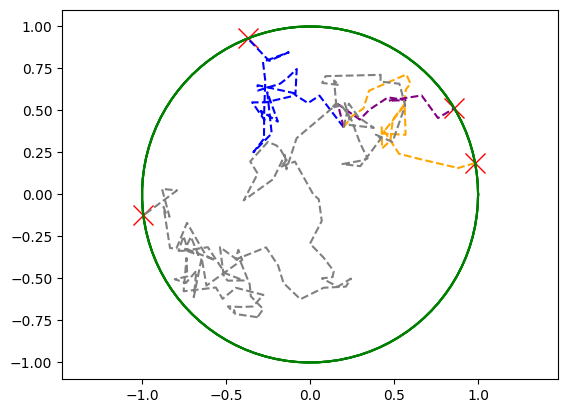

In [158]:
# your code
display_trajectory_boundary(1000,  np.array([0.2, 0.4]), 1e-2, 'orange')
display_trajectory_boundary(1000,  np.array([0.2, 0.4]), 1e-2, 'blue')
display_trajectory_boundary(1000,  np.array([0.2, 0.4]), 1e-2, 'purple')
display_trajectory_boundary(1000,  np.array([0.2, 0.4]), 1e-2, 'grey')

5. [Bonus] Generalize the procedure to a $M$-dimensional Brownian motion, $M > 2$.

**Answer:**

In [ ]:
# your code

---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a>

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

**Answer:**

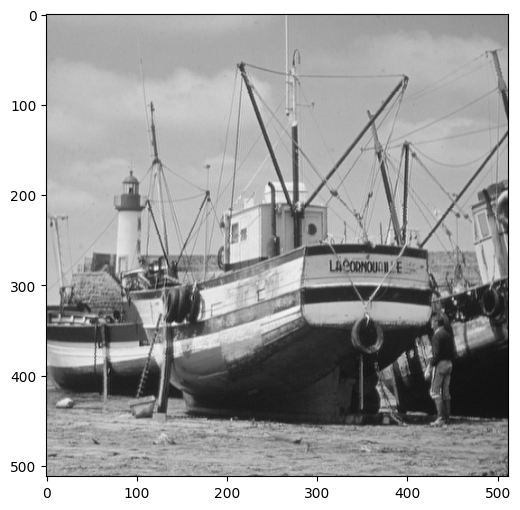

In [24]:
# your code
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

image_path = 'img/boat.png'
image = Image.open(image_path)

X = np.array(image)

plt.figure(figsize=(6, 6))
plt.imshow(X, 'gray')

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

**Answer:**

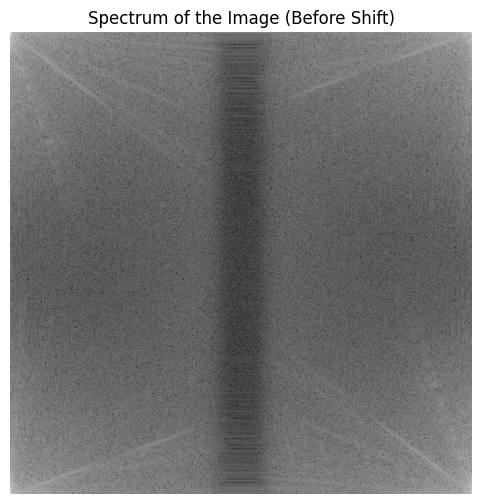

In [25]:
F_X = np.fft.fft2(X)

F_X_magnitude_squared = np.abs(F_X)**2

plt.figure(figsize=(6, 6))
plt.imshow(np.log(1 + F_X_magnitude_squared), cmap='gray')
plt.title('Spectrum of the Image (Before Shift)')
plt.axis('off')
plt.show()

2.a) La fréquence nulle est située tout en haut à gauche de l'image (aux coordonnées (0,0)).

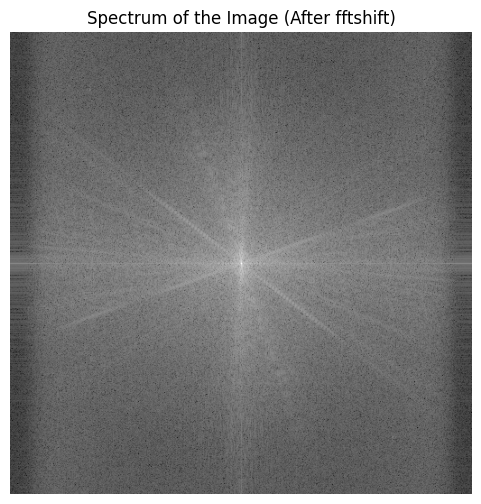

In [26]:
F_X_shifted = np.fft.fftshift(F_X_magnitude_squared)

plt.figure(figsize=(6, 6))
plt.imshow(np.log(1 + F_X_shifted), cmap='gray')
plt.title('Spectrum of the Image (After fftshift)')
plt.axis('off')
plt.show()

2.b) Avec fftshift, la fréquence nulle est bien située au centre de l'image.

3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

**Answer:**

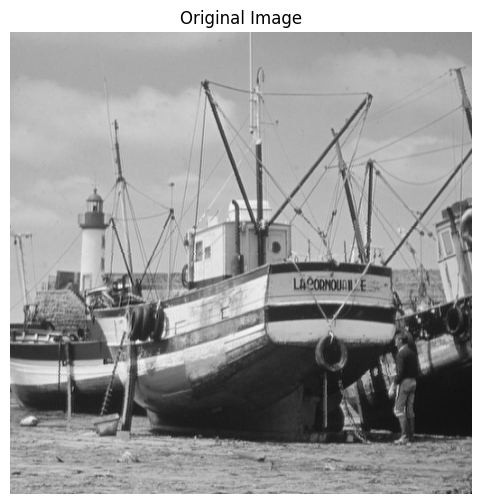

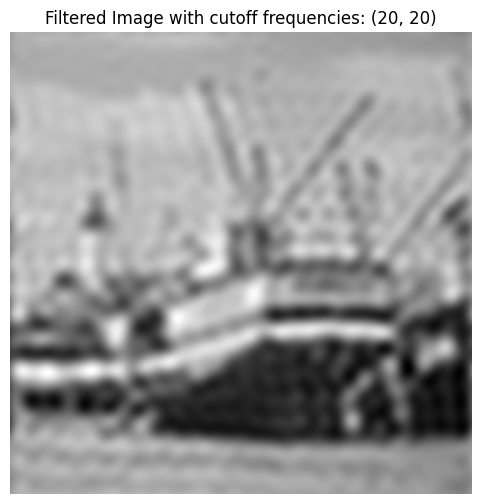

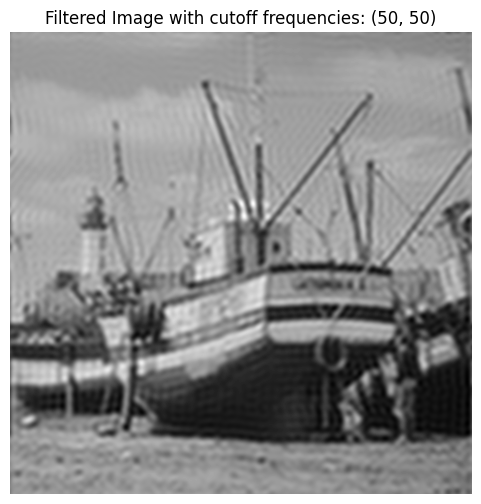

In [27]:
def ideal_lowpass_filter(image_array, f_c):
    """
    Applies an ideal low-pass filter to an image in the Fourier domain.

    Parameters:
    - image_array: 2D numpy array of the image
    - f_c: tuple (f_{c,y}, f_{c,x}) specifying the cutoff frequencies in y and x directions

    Returns:
    - filtered_image: The image after applying the low-pass filter
    """
    M, N = image_array.shape

    F_X = np.fft.fft2(image_array)
    F_X_shifted = np.fft.fftshift(F_X)

    # Create a zero mask
    mask = np.zeros((M, N), dtype=complex)
    center_y, center_x = M // 2, N // 2

    mask[center_y - f_c[0]:center_y + f_c[0], center_x - f_c[1]:center_x + f_c[1]] = 1

    # Apply the mask to the Fourier coefficients
    F_X_filtered = F_X_shifted * mask

    # Shift the frequencies back and perform the inverse Fourier transform
    F_X_filtered_shifted_back = np.fft.ifftshift(F_X_filtered)
    filtered_image = np.fft.ifft2(F_X_filtered_shifted_back)

    return np.abs(filtered_image)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(X, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

cutoffs = [(20, 20), (50, 50)]
for f_c in cutoffs:
    filtered_image = ideal_lowpass_filter(X, f_c)

    plt.figure(figsize=(6, 6))
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered Image with cutoff frequencies: {f_c}')
    plt.axis('off')
    plt.show()


Quand les fréquences de coupure augmentent, on se rapproche de l'image de départ. C'est cohérent car dans ce cas précis, le mask tend à prendre toutes les fréquences de la tranformée de Fourier. Ainsi, la reconstruction de l'image se fera avec un plus grand nombre de fréquences.

Les faibles fréquences correspondent principalement à la forme générale de l'image. Avec $fc=20$, on a une image assez floue qui ne contient pas les détails de l'image. En augmentant $fc$ (i.e. $fc=50$), on conserve plus de détails sur l'image.

4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform.

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis) (or `np.reshape` or built-in `np.outer`).

**Answer:**

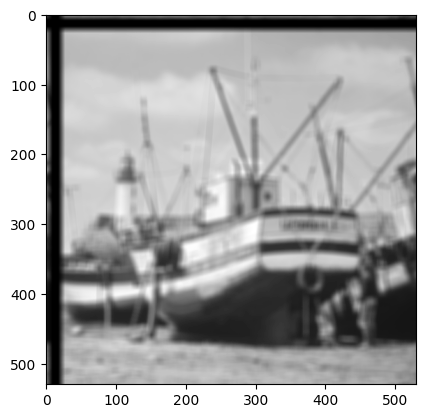

In [53]:
# your code
import scipy

M1, N1 = X.shape
M2, N2 = 10, 10
M, N = M1 + M2 - 1, N1 + N2 - 1
sig_x, sig_y = 10, 10

wy = scipy.signal.windows.gaussian(M2, sig_y)
wx = scipy.signal.windows.gaussian(N2, sig_x)

H = np.outer(wy, wx)

P1 = np.pad(X, [M - M1, N - N1])
P2 = np.pad(H, [N - N1, N - N2])

FP1 = np.fft.rfft2(P1)
FP2 = np.fft.rfft2(P2)

Had = np.multiply(FP1, FP2)

XH_conv = np.fft.irfft2(Had)

plt.imshow(XH_conv, 'gray')

On obtient une image plus floutée que l'image originale et les détails sont atténués, on a donc conservé uniquement les faibles fréquences. La convolution linéaire entre H et X est donc une autre manière de fabriquer un filtre passe-bas.